In [3]:
import os                       # os tillader os bl.a. at finde filplaceringer på computeren.
import numpy as np              # Numpy leverer noget af matematikken, der ligger under Pandas. 
import pandas as pd             # Pandas tillader os at importere, oprette og manipulere data frames.
from pandas import DataFrame    #Nogle libraries har under-biblioteker. Underbiblioteker importeres med from-kommandoen.
import matplotlib.pyplot as plt # Importerer underbiblioteket pyplot fra pakken matplotlib.
from nltk.text import Text      # nltk indholder mange forskellige funktioner, der kan bruges til tekstanalyse.
import glob                     # glob-modulet hjælper med at finde specifikke filnavne.
import re
from collections import Counter
!pip install afinn
from afinn import Afinn
afinn = Afinn(language='en')
import spacy          
nlp = spacy.load("en_core_web_lg")
from matplotlib import pyplot
import operator
from collections import defaultdict

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=4df974e42f7e939b8dcb2705dc243d9a44e5eac384bb86a1788db3e7eee7e308
  Stored in directory: c:\users\bruger\appdata\local\pip\cache\wheels\79\91\ee\8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [89]:
Chapterforanalysis = 0

In [4]:
def rens_ord(text_0):
    text_1 = text_0.replace("\n"," ")
    text_2 = text_1.replace("."," ")
    text_3 = text_2.replace(","," ")
    text_4 = text_3.replace(":"," ")
    text_5 = text_4.replace("*"," ")
    text_6 = text_5.replace("–"," ")
    text_7 = text_6.replace("'"," ")
    text_8 = text_7.replace("”"," ")
    text_ren = text_8.replace("-"," ")
    text_lav = text_ren.lower()
    text_token = text_lav.split()
    return text_token   

In [5]:
def rens_sæt(text_0):
    text_1 = text_0.replace("\n"," ")
    text_2 = text_1.replace(","," ")
    text_3 = text_2.replace(":"," ")
    text_4 = text_3.replace("*"," ")
    text_5 = text_4.replace("–"," ")
    text_6 = text_5.replace("'"," ")
    text_7 = text_6.replace("”"," ")
    text_ren = text_7.replace("-"," ")
    text_lav = text_ren.lower()
    text_token = text_lav.split(".")
    return text_token  

In [6]:
EksamensteksterGoTOpdelt = [] # opretter tom liste

path = os.path.join("EksamensteksterGoTOpdelt") # bruges for at undgå mac/pc-problemerne med absolutte stinavne

for fil in os.scandir(path): # for-loop
    with open (fil, encoding = "utf8") as f: # context manager
        EksamensteksterGoTOpdelt.append(f.read().replace("\n"," ").replace("*"," "))

Hej. 

In [7]:
EksamensteksterGoTOpdelt

['Kapitel 1.     The morning had dawned clear and cold, with a crispness that hinted at the end of summer. They set forth at daybreak to see a man beheaded, twenty in all, and Bran rode among them, nervous with excitement. This was the first time he had been deemed old enough to go with his lord father and his brothers to see the king\'s justice done. It was the ninth year of summer, and the seventh of Bran\'s life.   The man had been taken outside a small holdfast in the hills. Robb thought he was a wildling, his sword sworn to Mance Rayder, the King-beyond-the-Wall. It made Bran\'s skin prickle to think of it. He remembered the hearth tales Old Nan told them. The wildlings were cruel men, she said, slavers and slayers and thieves. They consorted with giants and ghouls, stole girl children in the dead of night, and drank blood from polished horns. And their women lay with the Others in the Long Night to sire terrible half-human children.   But the man they found bound hand and foot to

In [8]:
len(EksamensteksterGoTOpdelt)

15

In [9]:
PoV_Karakter = ["Bran", "Catelyn","Daenerys","Eddard","Jon","Catelyn","Arya","Bran","Arya","Bran","Sansa","Daenerys","Jon","Catelyn","Daenerys"]

In [10]:
Kapitler = [EksamensteksterGoTOpdelt[0],EksamensteksterGoTOpdelt[1],EksamensteksterGoTOpdelt[2],EksamensteksterGoTOpdelt[3],EksamensteksterGoTOpdelt[4],EksamensteksterGoTOpdelt[5],EksamensteksterGoTOpdelt[10],EksamensteksterGoTOpdelt[14],EksamensteksterGoTOpdelt[6],EksamensteksterGoTOpdelt[7],EksamensteksterGoTOpdelt[8],EksamensteksterGoTOpdelt[9],EksamensteksterGoTOpdelt[11],EksamensteksterGoTOpdelt[12],EksamensteksterGoTOpdelt[13]]

In [11]:
len(Kapitler)

15

In [12]:
fjernkapGoT = []
for i in range(15):
    fjernkapGoT.append(Kapitler[i][11:])
   #de første 11 tegn i hvert kapitel er fjernet.

In [119]:
fjernkapGoT[Chapterforanalysis] #det første kapitel. 

'    The morning had dawned clear and cold, with a crispness that hinted at the end of summer. They set forth at daybreak to see a man beheaded, twenty in all, and Bran rode among them, nervous with excitement. This was the first time he had been deemed old enough to go with his lord father and his brothers to see the king\'s justice done. It was the ninth year of summer, and the seventh of Bran\'s life.   The man had been taken outside a small holdfast in the hills. Robb thought he was a wildling, his sword sworn to Mance Rayder, the King-beyond-the-Wall. It made Bran\'s skin prickle to think of it. He remembered the hearth tales Old Nan told them. The wildlings were cruel men, she said, slavers and slayers and thieves. They consorted with giants and ghouls, stole girl children in the dead of night, and drank blood from polished horns. And their women lay with the Others in the Long Night to sire terrible half-human children.   But the man they found bound hand and foot to the holdfas

In [14]:
df_GoT = pd.DataFrame ({"PoV_Karakter": PoV_Karakter, "Kapitlerne": fjernkapGoT,})

In [15]:
df_GoT.index = np.arange(1, len(df_GoT)+1)

In [16]:
df_GoT["renTxtOrd"] = df_GoT.Kapitlerne.apply(rens_ord)

In [17]:
df_GoT["antalOrd"] = df_GoT.renTxtOrd.apply(len)

In [18]:
df_GoT["renTxtSæt"] = [rens_sæt(txt) for txt in df_GoT["Kapitlerne"]]

In [19]:
df_GoT["antalSæt"] = [len(txt) for txt in df_GoT["renTxtSæt"]]

In [20]:
df_GoT["antalTegn"] = [len(txt) for txt in df_GoT["Kapitlerne"]]

In [21]:
df_GoT

,PoV_Karakter,Kapitlerne,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn
1,Bran,"The morning had dawned clear and cold, wit...","[the, morning, had, dawned, clear, and, cold, ...",3158,[ the morning had dawned clear and cold wi...,268,16385
2,Catelyn,Catelyn had never liked this godswood. ...,"[catelyn, had, never, liked, this, godswood, s...",2135,"[ catelyn had never liked this godswood, ...",169,11119
3,Daenerys,Her brother held the gown up for her insp...,"[her, brother, held, the, gown, up, for, her, ...",4256,[ her brother held the gown up for her ins...,324,23048
4,Eddard,The visitors poured through the castle ga...,"[the, visitors, poured, through, the, castle, ...",3916,[ the visitors poured through the castle g...,344,20469
5,Jon,"There were times - not many, but a few - ...","[there, were, times, not, many, but, a, few, w...",3382,[ there were times not many but a few ...,281,17621
6,Catelyn,Of all the rooms in Winterfell's Great Ke...,"[of, all, the, rooms, in, winterfell, s, great...",3616,[ of all the rooms in winterfell s great k...,357,18756
7,Arya,Arya Arya's stitches were crooked again. ...,"[arya, arya, s, stitches, were, crooked, again...",2823,"[ arya arya s stitches were crooked again, ...",284,15120
8,Bran,The hunt left at dawn. The king wanted wi...,"[the, hunt, left, at, dawn, the, king, wanted,...",3868,"[ the hunt left at dawn, the king wanted ...",306,20209
9,Arya,The scent of hot bread drifting from the...,"[the, scent, of, hot, bread, drifting, from, t...",5100,[ the scent of hot bread drifting from th...,365,26670
10,Bran,"The oldest were men grown, seventeen and...","[the, oldest, were, men, grown, seventeen, and...",4441,[ the oldest were men grown seventeen an...,376,23156


In [22]:
df_GoT.describe()

,antalOrd,antalSæt,antalTegn
count,15.000000,15.000000,15.000000
mean,4131.666667,361.933333,21641.666667
std,1330.373506,141.347832,6977.289708
min,2135.000000,169.000000,11119.000000
25%,3499.000000,282.500000,18188.500000
50%,3868.000000,326.000000,20209.000000
75%,4573.000000,370.500000,24186.500000
max,7938.000000,777.000000,41619.000000


In [23]:
df_GoT["gnmSætLæng"] =df_GoT["antalOrd"]/df_GoT["antalSæt"]

In [24]:
df_GoT.to_csv("ASOIAF_datasæt_renset.csv", index=False) #gemmer som csv-fil.

In [25]:
df_GoT.to_csv 

<bound method NDFrame.to_csv of    PoV_Karakter                                         Kapitlerne  \
1          Bran      The morning had dawned clear and cold, wit...   
2       Catelyn       Catelyn had never liked this godswood.   ...   
3      Daenerys       Her brother held the gown up for her insp...   
4        Eddard       The visitors poured through the castle ga...   
5           Jon       There were times - not many, but a few - ...   
6       Catelyn       Of all the rooms in Winterfell's Great Ke...   
7          Arya    Arya   Arya's stitches were crooked again.  ...   
8          Bran       The hunt left at dawn. The king wanted wi...   
9          Arya        The scent of hot bread drifting from the...   
10         Bran        The oldest were men grown, seventeen and...   
11        Sansa       In the tower room at the heart of Maegor'...   
12     Daenerys        Wings shadowed her fever dreams.   "You ...   
13          Jon        The mare whickered softly as Jon Sn

In [26]:
y=df_GoT["gnmSætLæng"]

In [27]:
x=list(range(1,16))

([<matplotlib.axis.XTick at 0x23166ef5dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

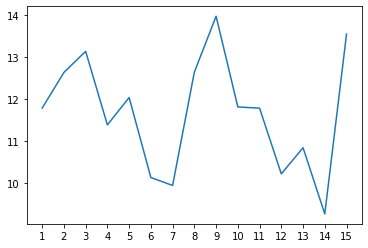

In [28]:
plt.plot(x,y)
plt.xticks(x)

In [90]:
counts = Counter(fjernkapGoT[Chapterforanalysis].split(" ")) #splitter strengen hver eneste gang, der registeres et blanktegn. En dictionary af hele kapitel 1 splittet. 
print(counts)

Counter({'': 185, 'the': 168, 'and': 81, 'his': 79, 'of': 71, 'to': 57, 'a': 55, 'was': 51, 'in': 41, 'he': 39, 'Bran': 36, 'with': 28, 'as': 26, 'Jon': 26, 'you': 25, 'He': 24, 'father': 23, 'not': 23, 'had': 22, 'The': 21, 'said.': 21, 'Robb': 20, 'man': 17, 'at': 15, 'that': 14, 'their': 14, 'on': 13, 'will': 13, 'lord': 11, 'from': 11, 'His': 11, 'him': 11, 'it': 11, 'were': 10, 'them': 10, 'eyes': 10, 'off': 10, 'but': 10, 'Greyjoy': 10, 'did': 10, 'him.': 10, 'is': 10, 'for': 10, 'have': 10, 'It': 9, 'all': 9, 'up': 9, 'told': 8, 'they': 8, 'than': 8, 'be': 8, 'no': 8, 'pup': 8, 'been': 7, 'said,': 7, 'who': 7, 'could': 7, 'what': 7, 'Theon': 7, 'looked': 7, '"You': 7, 'They': 6, 'see': 6, "Bran's": 6, 'them.': 6, 'dead': 6, 'brother': 6, 'horse': 6, 'still': 6, 'A': 6, 'direwolf': 6, 'look': 6, 'gave': 6, 'Jory': 6, 'do': 6, 'if': 6, 'keep': 6, 'so': 6, 'one': 6, 'must': 6, '"I': 6, 'them,': 5, 'enough': 5, 'down': 5, 'before': 5, 'across': 5, 'an': 5, 'long': 5, 'would': 5, 'tw

In [30]:
#Jeg bruger nedenstående funktion for at søge efter et ords root. 
counts['he']

39

In [ ]:
#Først leder jeg efter forekomster, som betegner køn: 

In [91]:
def freq(Lines, str):
    words = Lines.split()
    words_list = []
    for i in words:
        if str in i:
            words_list.append(fjernkapGoT[Chapterforanalysis])
    return(len(words_list)) #her bruger jeg return for at få en samlet antal forekomster af navnet. 
#der angives forskel på stort og småt begyndelsesbogstav, men ikke andre tegn. Derfor indgår f.eks. "Jon?" i alle søgninger på "Jon". 

In [ ]:
#Først leder jeg efter forekomster, som betegner køn: 

In [92]:
KCounter = {"Woman":freq(fjernkapGoT[Chapterforanalysis],"Woman"),"woman":freq(fjernkapGoT[Chapterforanalysis],"woman"),"Women":freq(fjernkapGoT[Chapterforanalysis],"Women"),"women":freq(fjernkapGoT[Chapterforanalysis],"women"),"girl":freq(fjernkapGoT[Chapterforanalysis],"girl"),"girls":freq(fjernkapGoT[Chapterforanalysis],"girls"),"herself":freq(fjernkapGoT[Chapterforanalysis],"herself"),"females":freq(fjernkapGoT[Chapterforanalysis],"females"),"Wife":freq(fjernkapGoT[Chapterforanalysis],"Wife"),"wife":freq(fjernkapGoT[Chapterforanalysis],"wife"),"Wives":freq(fjernkapGoT[Chapterforanalysis],"Wives"),"wives":freq(fjernkapGoT[Chapterforanalysis],"wives"),"Queen":freq(fjernkapGoT[Chapterforanalysis],"Queen"),"Queens":freq(fjernkapGoT[Chapterforanalysis],"Queens"),"queen":freq(fjernkapGoT[Chapterforanalysis],"queen"),"queens":freq(fjernkapGoT[Chapterforanalysis],"queens"),"Mother":freq(fjernkapGoT[Chapterforanalysis],"Mother"),"mother":freq(fjernkapGoT[Chapterforanalysis],"mother"),"Sister":freq(fjernkapGoT[Chapterforanalysis],"Sister"),"sister":freq(fjernkapGoT[Chapterforanalysis],"sister"),"Lady":freq(fjernkapGoT[Chapterforanalysis],"Lady"),"lady":freq(fjernkapGoT[0],"lady"),"Ladies":freq(fjernkapGoT[Chapterforanalysis],"Ladies"),"ladies":freq(fjernkapGoT[Chapterforanalysis],"ladies"),"Her":counts['Her'],"her":counts['her'],"She":counts['She'],"she":counts['she']}

In [93]:
KCounter

{'Woman': 0,
 'woman': 1,
 'Women': 0,
 'women': 2,
 'girl': 2,
 'girls': 1,
 'herself': 0,
 'females': 0,
 'Wife': 0,
 'wife': 0,
 'Wives': 0,
 'wives': 0,
 'Queen': 0,
 'Queens': 0,
 'queen': 0,
 'queens': 0,
 'Mother': 0,
 'mother': 1,
 'Sister': 0,
 'sister': 0,
 'Lady': 0,
 'lady': 0,
 'Ladies': 0,
 'ladies': 0,
 'Her': 0,
 'her': 0,
 'She': 0,
 'she': 3}

In [39]:
sum(KCounter.values())

10

In [127]:
MCounter = {"Man":freq(fjernkapGoT[Chapterforanalysis],"Man"),"man":freq(fjernkapGoT[Chapterforanalysis],"man"),"Men":freq(fjernkapGoT[Chapterforanalysis],"Men"),"men":freq(fjernkapGoT[Chapterforanalysis],"men"),"boy":freq(fjernkapGoT[Chapterforanalysis],"boy"),"boys":freq(fjernkapGoT[Chapterforanalysis],"boys"),"himself":freq(fjernkapGoT[0],"himself"),"male":freq(fjernkapGoT[Chapterforanalysis],"male"),"Husband":freq(fjernkapGoT[Chapterforanalysis],"Husband"),"husband":freq(fjernkapGoT[Chapterforanalysis],"husband"),"King":freq(fjernkapGoT[Chapterforanalysis],"King"),"king":freq(fjernkapGoT[0],"king"),"Kings":freq(fjernkapGoT[Chapterforanalysis],"Kings"),"kings":freq(fjernkapGoT[Chapterforanalysis],"kings"),"Father":freq(fjernkapGoT[Chapterforanalysis],"Father"),"father":freq(fjernkapGoT[Chapterforanalysis],"father"),"Brother":freq(fjernkapGoT[Chapterforanalysis],"Brother"),"brother":freq(fjernkapGoT[Chapterforanalysis],"brother"),"Sire":freq(fjernkapGoT[Chapterforanalysis],"Sire"),"sire":freq(fjernkapGoT[Chapterforanalysis],"sire"),"Sirs":freq(fjernkapGoT[0],"Sirs"),"sirs":freq(fjernkapGoT[Chapterforanalysis],"sirs"),"Him":freq(fjernkapGoT[0],"Him"),"him":freq(fjernkapGoT[Chapterforanalysis],"him"),"His":counts['His'],"his":counts['his'],"He":counts['He'],"he":counts['he']}

In [128]:
MCounter

{'Man': 1,
 'man': 29,
 'Men': 2,
 'men': 11,
 'boy': 3,
 'boys': 2,
 'himself': 2,
 'male': 2,
 'Husband': 0,
 'husband': 0,
 'King': 4,
 'king': 10,
 'Kings': 0,
 'kings': 1,
 'Father': 10,
 'father': 28,
 'Brother': 0,
 'brother': 10,
 'Sire': 0,
 'sire': 1,
 'Sirs': 0,
 'sirs': 0,
 'Him': 0,
 'him': 29,
 'His': 11,
 'his': 79,
 'He': 24,
 'he': 39}

In [129]:
sum(MCounter.values())

298

In [ ]:
#Derefter leder jeg efter relevante personer i teksten. 

In [40]:
BranCounter = {"Bran":freq(fjernkapGoT[Chapterforanalysis],"Bran"),"Brandon":freq(fjernkapGoT[Chapterforanalysis],"Brandon")}

In [41]:
BranCounter

{'Bran': 46, 'Brandon': 0}

In [138]:
NedCounter = {"Father":freq(fjernkapGoT[Chapterforanalysis],"Father"),"father":freq(fjernkapGoT[Chapterforanalysis],"father"),"Ned":freq(fjernkapGoT[Chapterforanalysis],"Ned"),"Lord":freq(fjernkapGoT[Chapterforanalysis],"Lord"),"lord":freq(fjernkapGoT[Chapterforanalysis],"lord")}
#key er "Father", value er hvor mange forekomster af "Father" der er. 
#kan ikke søge på lord father pga.den er splittet. 

In [139]:
NedCounter
sum(NedCounter.values())

56

In [140]:
new_max_val = max(NedCounter.items(), key=operator.itemgetter(1))[Chapterforanalysis]
print(new_max_val) #printer hvad han bliver mest omtalt som. 

father


In [100]:
CatelynCounter = {"Catelyn":freq(fjernkapGoT[Chapterforanalysis],"Catelyn"),"Cat":counts['Cat']}

In [101]:
CatelynCounter

{'Catelyn': 0, 'Cat': 0}

In [102]:
JonCounter = {"Jon":freq(fjernkapGoT[Chapterforanalysis],"Jon"),"Snow":freq(fjernkapGoT[Chapterforanalysis],"Snow")}

In [48]:
JonCounter

{'Jon': 31, 'Snow': 5}

In [120]:
RobbCounter = {"Robert":freq(fjernkapGoT[Chapterforanalysis],"Robert"),"Robb":counts['Robb']}
#Denne er tricky, fordi "Robb" kan også være en del af "Robbed/Robbing" osv. Derfor har jeg valgt, at lede efter specifikke counts af "Robb."
#Dermed inddrages instanser af "Robb?" osv. ikke. Dette skal jeg have in mente til opgaveskrivningen.  

In [121]:
RobbCounter 

{'Robert': 2, 'Robb': 20}

In [105]:
TheonCounter = {"Theon":freq(fjernkapGoT[Chapterforanalysis],"Theon"),"Greyjoy":freq(fjernkapGoT[Chapterforanalysis],"Greyjoy")}

In [106]:
TheonCounter

{'Theon': 7, 'Greyjoy': 13}

In [107]:
NanCounter = {"Nan":counts['Nan']}

In [108]:
NanCounter

{'Nan': 2}

In [109]:
RickonCounter = {"Rickon":freq(fjernkapGoT[Chapterforanalysis],"Rickon")}

In [56]:
RickonCounter

{'Rickon': 1}

In [110]:
SansaCounter = {"Sansa":freq(fjernkapGoT[Chapterforanalysis],"Sansa")}

In [58]:
SansaCounter

{'Sansa': 0}

In [111]:
AryaCounter = {"Arya":freq(fjernkapGoT[Chapterforanalysis],"Arya")}

In [60]:
AryaCounter

{'Arya': 0}

In [112]:
JoryCounter = {"Jory":freq(fjernkapGoT[Chapterforanalysis],"Jory")}

In [62]:
JoryCounter #hvordan assigner jeg disse karakterer mandlige og kvindelige pronomener? 

{'Jory': 11}

In [141]:
Mænd=[NedCounter,BranCounter,JonCounter,TheonCounter,RickonCounter,JoryCounter,RobbCounter] #en form for nested liste. NedCounter er originalt et dictionary. Så en masse dictionaries i en liste.
print(Mænd)

[{'Father': 10, 'father': 28, 'Ned': 0, 'Lord': 5, 'lord': 13}, {'Bran': 46, 'Brandon': 0}, {'Jon': 31, 'Snow': 5}, {'Theon': 7, 'Greyjoy': 13}, {'Rickon': 1}, {'Jory': 11}, {'Robert': 2, 'Robb': 20}]


In [142]:
mændtotal = 0
for dic in Mænd: #i som variabel.Indeholder de dictionaries, der er i listen "Mænd".
    mændtotal += sum(dic.values()) #x+=3 Svarer til x=x+3
print(mændtotal)

192


In [65]:
Kvinder=[NanCounter,AryaCounter,SansaCounter,CatelynCounter]

In [66]:
kvindertotal = 0
for dic in Kvinder: #i som variabel.Indeholder de dictionaries, der er i listen "Mænd".
    kvindertotal += sum(dic.values()) #x+=3 Svarer til x=x+3
print(kvindertotal)

2


In [ ]:
#scatter plot skal nok bruges. Kongens Fald. Gøres på dataframe med kapitler. 
#Lav derfor en funktion, hvor den tæller mandlige og kvindelige. brug applly vha. ny kolonne. 
#en kolonne med score. 

In [67]:
def find_ord(txt):
    x = []
    y = list(txt.sents)
    for s in y:                   
        for w in s:               
            if w.pos_ == "ADJ" or w.pos_ == "NOUN":
                x.append(w.text)
    return sorted(set(x))       

#for s in y. y er teksten, så for hver ord i elementet (teksten). Hvis ordet er enten et adjektiv eller substantiv
#så skal det tilføjes til listen x. 

In [68]:
df_GoT["nlp_Tekst"] = df_GoT.Kapitlerne.apply(nlp)

In [69]:
print(df_GoT["nlp_Tekst"])

1     (    , The, morning, had, dawned, clear, and, ...
2     (     , Catelyn, had, never, liked, this, gods...
3     (     , Her, brother, held, the, gown, up, for...
4     (     , The, visitors, poured, through, the, c...
5     (     , There, were, times, -, not, many, ,, b...
6     (     , Of, all, the, rooms, in, Winterfell, '...
7     (  , Arya,   , Arya, 's, stitches, were, crook...
8     (     , The, hunt, left, at, dawn, ., The, kin...
9     (      , The, scent, of, hot, bread, drifting,...
10    (      , The, oldest, were, men, grown, ,, sev...
11    (     , In, the, tower, room, at, the, heart, ...
12    (      , Wings, shadowed, her, fever, dreams, ...
13    (      , The, mare, whickered, softly, as, Jon...
14    (       , It, seemed, a, thousand, years, ago,...
15    (      , The, land, was, red, and, dead, and, ...
Name: nlp_Tekst, dtype: object


In [70]:
def streng(lst):
    return " ".join(lst)

In [71]:
df_GoT["Subst_adj"] = df_GoT.nlp_Tekst.apply(find_ord)

In [72]:
df_GoT["Subst_adj_streng"] = df_GoT.Subst_adj.apply(streng)

In [73]:
df_GoT.head(15)

,PoV_Karakter,Kapitlerne,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn,gnmSætLæng,nlp_Tekst,Subst_adj,Subst_adj_streng
1,Bran,"The morning had dawned clear and cold, wit...","[the, morning, had, dawned, clear, and, cold, ...",3158,[ the morning had dawned clear and cold wi...,268,16385,11.783582,"( , The, morning, had, dawned, clear, and, ...","[Blood, Bran, Direwolves, Easy, Gods, Ice, Kin...",Blood Bran Direwolves Easy Gods Ice King Name ...
2,Catelyn,Catelyn had never liked this godswood. ...,"[catelyn, had, never, liked, this, godswood, s...",2135,"[ catelyn had never liked this godswood, ...",169,11119,12.633136,"( , Catelyn, had, never, liked, this, gods...","[Damnation, Dread, Family, Gods, Kings, Mad, M...",Damnation Dread Family Gods Kings Mad Men Othe...
3,Daenerys,Her brother held the gown up for her insp...,"[her, brother, held, the, gown, up, for, her, ...",4256,[ her brother held the gown up for her ins...,324,23048,13.135802,"( , Her, brother, held, the, gown, up, for...","[Absurd, Anger, Boys, Dragons, Gemstones, Gods...",Absurd Anger Boys Dragons Gemstones Gods Good ...
4,Eddard,The visitors poured through the castle ga...,"[the, visitors, poured, through, the, castle, ...",3916,[ the visitors poured through the castle g...,344,20469,11.383721,"( , The, visitors, poured, through, the, c...","[Blind, End, Enough, Flowers, Grace, Half, Kin...",Blind End Enough Flowers Grace Half Kings Late...
5,Jon,"There were times - not many, but a few - ...","[there, were, times, not, many, but, a, few, w...",3382,[ there were times not many but a few ...,281,17621,12.035587,"( , There, were, times, -, not, many, ,, b...","[Armor, Boy, Dwarfs, Generations, Ghost, Half,...",Armor Boy Dwarfs Generations Ghost Half Hungry...
6,Catelyn,Of all the rooms in Winterfell's Great Ke...,"[of, all, the, rooms, in, winterfell, s, great...",3616,[ of all the rooms in winterfell s great k...,357,18756,10.128852,"( , Of, all, the, rooms, in, Winterfell, '...","[Bran, Gods, Great, Honors, Luwin, Many, No, O...",Bran Gods Great Honors Luwin Many No Open Othe...
7,Arya,Arya Arya's stitches were crooked again. ...,"[arya, arya, s, stitches, were, crooked, again...",2823,"[ arya arya s stitches were crooked again, ...",284,15120,9.940141,"( , Arya, , Arya, 's, stitches, were, crook...","[Bastards, Enough, Ghost, Girls, Great, Live, ...",Bastards Enough Ghost Girls Great Live Master ...
8,Bran,The hunt left at dawn. The king wanted wi...,"[the, hunt, left, at, dawn, the, king, wanted,...",3868,"[ the hunt left at dawn, the king wanted ...",306,20209,12.640523,"( , The, hunt, left, at, dawn, ., The, kin...","[Bran, Crows, Duty, Faces, Fingernails, First,...",Bran Crows Duty Faces Fingernails First Ghost ...
9,Arya,The scent of hot bread drifting from the...,"[the, scent, of, hot, bread, drifting, from, t...",5100,[ the scent of hot bread drifting from th...,365,26670,13.972603,"( , The, scent, of, hot, bread, drifting,...","[Ashamed, Beloved, Blood, Bodies, Flocks, Fool...",Ashamed Beloved Blood Bodies Flocks Fool Grace...
10,Bran,"The oldest were men grown, seventeen and...","[the, oldest, were, men, grown, seventeen, and...",4441,[ the oldest were men grown seventeen an...,376,23156,11.811170,"( , The, oldest, were, men, grown, ,, sev...","[Blood, Bones, Bran, Careful, Dead, Dreams, Fe...",Blood Bones Bran Careful Dead Dreams Fear Firs...


In [118]:
df_GoT["Sentiment_score"] = df_GoT.Subst_adj_streng.apply(afinn.score)
df_GoT

,PoV_Karakter,Kapitlerne,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn,gnmSætLæng,nlp_Tekst,Subst_adj,Subst_adj_streng,Sentiment_score
1,Bran,"The morning had dawned clear and cold, wit...","[the, morning, had, dawned, clear, and, cold, ...",3158,[ the morning had dawned clear and cold wi...,268,16385,11.783582,"( , The, morning, had, dawned, clear, and, ...","[Blood, Bran, Direwolves, Easy, Gods, Ice, Kin...",Blood Bran Direwolves Easy Gods Ice King Name ...,-3.0
2,Catelyn,Catelyn had never liked this godswood. ...,"[catelyn, had, never, liked, this, godswood, s...",2135,"[ catelyn had never liked this godswood, ...",169,11119,12.633136,"( , Catelyn, had, never, liked, this, gods...","[Damnation, Dread, Family, Gods, Kings, Mad, M...",Damnation Dread Family Gods Kings Mad Men Othe...,13.0
3,Daenerys,Her brother held the gown up for her insp...,"[her, brother, held, the, gown, up, for, her, ...",4256,[ her brother held the gown up for her ins...,324,23048,13.135802,"( , Her, brother, held, the, gown, up, for...","[Absurd, Anger, Boys, Dragons, Gemstones, Gods...",Absurd Anger Boys Dragons Gemstones Gods Good ...,32.0
4,Eddard,The visitors poured through the castle ga...,"[the, visitors, poured, through, the, castle, ...",3916,[ the visitors poured through the castle g...,344,20469,11.383721,"( , The, visitors, poured, through, the, c...","[Blind, End, Enough, Flowers, Grace, Half, Kin...",Blind End Enough Flowers Grace Half Kings Late...,-1.0
5,Jon,"There were times - not many, but a few - ...","[there, were, times, not, many, but, a, few, w...",3382,[ there were times not many but a few ...,281,17621,12.035587,"( , There, were, times, -, not, many, ,, b...","[Armor, Boy, Dwarfs, Generations, Ghost, Half,...",Armor Boy Dwarfs Generations Ghost Half Hungry...,4.0
6,Catelyn,Of all the rooms in Winterfell's Great Ke...,"[of, all, the, rooms, in, winterfell, s, great...",3616,[ of all the rooms in winterfell s great k...,357,18756,10.128852,"( , Of, all, the, rooms, in, Winterfell, '...","[Bran, Gods, Great, Honors, Luwin, Many, No, O...",Bran Gods Great Honors Luwin Many No Open Othe...,-16.0
7,Arya,Arya Arya's stitches were crooked again. ...,"[arya, arya, s, stitches, were, crooked, again...",2823,"[ arya arya s stitches were crooked again, ...",284,15120,9.940141,"( , Arya, , Arya, 's, stitches, were, crook...","[Bastards, Enough, Ghost, Girls, Great, Live, ...",Bastards Enough Ghost Girls Great Live Master ...,12.0
8,Bran,The hunt left at dawn. The king wanted wi...,"[the, hunt, left, at, dawn, the, king, wanted,...",3868,"[ the hunt left at dawn, the king wanted ...",306,20209,12.640523,"( , The, hunt, left, at, dawn, ., The, kin...","[Bran, Crows, Duty, Faces, Fingernails, First,...",Bran Crows Duty Faces Fingernails First Ghost ...,-10.0
9,Arya,The scent of hot bread drifting from the...,"[the, scent, of, hot, bread, drifting, from, t...",5100,[ the scent of hot bread drifting from th...,365,26670,13.972603,"( , The, scent, of, hot, bread, drifting,...","[Ashamed, Beloved, Blood, Bodies, Flocks, Fool...",Ashamed Beloved Blood Bodies Flocks Fool Grace...,-15.0
10,Bran,"The oldest were men grown, seventeen and...","[the, oldest, were, men, grown, seventeen, and...",4441,[ the oldest were men grown seventeen an...,376,23156,11.811170,"( , The, oldest, were, men, grown, ,, sev...","[Blood, Bones, Bran, Careful, Dead, Dreams, Fe...",Blood Bones Bran Careful Dead Dreams Fear Firs...,-37.0


In [74]:
def bar_plot(ax, data, group_stretch=0.8, bar_stretch=0.95,
             legend=True, x_labels=True, label_fontsize=8,
             colors=None, barlabel_offset=1,
             bar_labeler=lambda k, i, s: str(round(s, 3))):
    #"""
    #Draws a bar plot with multiple bars per data point.
    #:param dict data: The data we want to plot, wher keys are the names of each
    #  bar group, and items is a list of bar values for the corresponding group.
    #:param float group_stretch: 1 means groups occupy the most (largest groups
    #  touch side to side if they have equal number of bars).
    #:param float bar_stretch: If 1, bars within a group will touch side to side.
    #:param bool x_labels: If true, x-axis will contain labels with the group
    #names given at data, centered at the bar group.
    #:param int label_fontsize: Font size for the label on top of each bar.
    #:param float barlabel_offset: Distance, in y-values, between the top of the
    #  bar and its label.
    #:param function bar_labeler: If not None, must be a functor with signature
    #  ``f(group_name, i, scalar)->str``, where each scalar is the entry found at
    #  data[group_name][i]. When given, returns a label to put on the top of each
    #  bar. Otherwise no labels on top of bars.
    #"""
    sorted_data = list(sorted(data.items(), key=lambda elt: elt[0]))
    sorted_k, sorted_v  = zip(*sorted_data)
    max_n_bars = max(len(v) for v in data.values())
    group_centers = np.cumsum([max_n_bars
                               for _ in sorted_data]) - (max_n_bars / 2)
    bar_offset = (1 - bar_stretch) / 2
    bars = defaultdict(list)
    #
    if colors is None:
        colors = {g_name: [f"C{i}" for _ in values]
                  for i, (g_name, values) in enumerate(data.items())}
    #
    for g_i, ((g_name, vals), g_center) in enumerate(zip(sorted_data,
                                                         group_centers)):
        n_bars = len(vals)
        group_beg = g_center - (n_bars / 2) + (bar_stretch / 2)
        for val_i, val in enumerate(vals):
            bar = ax.bar(group_beg + val_i + bar_offset,
                         height=val, width=bar_stretch,
                         color=colors[g_name][val_i])[0]
            bars[g_name].append(bar)
            if  bar_labeler is not None:
                x_pos = bar.get_x() + (bar.get_width() / 2.0)
                y_pos = val + barlabel_offset
                barlbl = bar_labeler(g_name, val_i, val)
                ax.text(x_pos, y_pos, barlbl, ha="center", va="bottom",
                        fontsize=label_fontsize)
    if legend:
        ax.legend([bars[k][0] for k in sorted_k], sorted_k)
    #
    ax.set_xticks(group_centers)
    if x_labels:
        ax.set_xticklabels(sorted_k)
    else:
        ax.set_xticklabels()
    return bars, group_centers

#En funktion, der plotter et histogram. 

C:\Users\Bruger\AppData\Local\Temp/ipykernel_13432/670423609.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


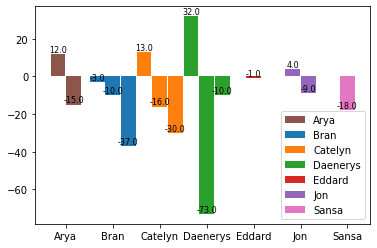

In [80]:
fig, ax = plt.subplots()
Data = {"Bran":[df_GoT.iat[0,11],df_GoT.iat[7,11],df_GoT.iat[9,11]], "Catelyn":[df_GoT.iat[1,11],df_GoT.iat[5,11],df_GoT.iat[13,11]],"Daenerys":[df_GoT.iat[2,11],df_GoT.iat[11,11],df_GoT.iat[14,11]],"Eddard":[df_GoT.iat[3,11]],"Jon":[df_GoT.iat[4,11],df_GoT.iat[12,11]],"Arya":[df_GoT.iat[6,11],df_GoT.iat[8,11]],"Sansa":[df_GoT.iat[10,11]]}
bar_plot(ax, Data, group_stretch=0.8, bar_stretch=0.95, legend=True, x_labels=True, label_fontsize=8, barlabel_offset=0.05,bar_labeler=lambda k, i, s: str(round(s, 3)))
fig.show()
#df_GoT.iat[0,11] Vi henter den værdi, der er i data-framen, på position 0,11.
#Dert svarer til den første sentiment-score.
#Så 0 er første kapitel (m. Bran), og 11 er der, hvor sentiment-scoren er placeret, i dataframet. 
#PoV-karakter er f.eks. position x,0 (anden position) 
#så der ville man skrive [x,0].x er variablet, f.eks. Brans første kapitel plus sentimentscore ville så være [0,0] 
#Den første beskriver, hvilken række man er. Den anden beskriver hvilken kolonne man er i. 

In [113]:
for w in Kapitler[Chapterforanalysis].split(" "): #afinn.score, man splitter teksten og hver ord får en score. 
    print(w, afinn.score(w))
    #den tale på listen med taler indeks nr. 0 (dvs. den første tale).
    #laves til en ordliste, og jeg giver hvert enkelt ord en score.  
    #Der er også mange eksempler, hvor konteksten er afgørende. Fuck kan være en positiv eller negativ forstærker.

Kapitel 0.0
1. 0.0
 0.0
 0.0
 0.0
 0.0
The 0.0
morning 0.0
had 0.0
dawned 0.0
clear 1.0
and 0.0
cold, 0.0
with 0.0
a 0.0
crispness 0.0
that 0.0
hinted 0.0
at 0.0
the 0.0
end 0.0
of 0.0
summer. 0.0
They 0.0
set 0.0
forth 0.0
at 0.0
daybreak 0.0
to 0.0
see 0.0
a 0.0
man 0.0
beheaded, 0.0
twenty 0.0
in 0.0
all, 0.0
and 0.0
Bran 0.0
rode 0.0
among 0.0
them, 0.0
nervous -2.0
with 0.0
excitement. 3.0
This 0.0
was 0.0
the 0.0
first 0.0
time 0.0
he 0.0
had 0.0
been 0.0
deemed 0.0
old 0.0
enough 0.0
to 0.0
go 0.0
with 0.0
his 0.0
lord 0.0
father 0.0
and 0.0
his 0.0
brothers 0.0
to 0.0
see 0.0
the 0.0
king's 0.0
justice 2.0
done. 0.0
It 0.0
was 0.0
the 0.0
ninth 0.0
year 0.0
of 0.0
summer, 0.0
and 0.0
the 0.0
seventh 0.0
of 0.0
Bran's 0.0
life. 0.0
 0.0
 0.0
The 0.0
man 0.0
had 0.0
been 0.0
taken 0.0
outside 0.0
a 0.0
small 0.0
holdfast 0.0
in 0.0
the 0.0
hills. 0.0
Robb 0.0
thought 0.0
he 0.0
was 0.0
a 0.0
wildling, 0.0
his 0.0
sword 0.0
sworn 0.0
to 0.0
Mance 0.0
Rayder, 0.0
the 0.0
King-beyon

the 0.0
least." 0.0
 0.0
 0.0
"No," -1.0
Jon 0.0
Snow 0.0
said 0.0
quietly. 0.0
"It 0.0
was 0.0
not 0.0
courage. 2.0
This 0.0
one 0.0
was 0.0
dead -3.0
of 0.0
fear. -2.0
You 0.0
could 0.0
see 0.0
it 0.0
in 0.0
his 0.0
eyes, 0.0
Stark." 0.0
Jon's 0.0
eyes 0.0
were 0.0
a 0.0
grey -1.0
so 0.0
dark 0.0
they 0.0
seemed 0.0
almost 0.0
black, 0.0
but 0.0
there 0.0
was 0.0
little 0.0
they 0.0
did 0.0
not 0.0
see. 0.0
He 0.0
was 0.0
of 0.0
an 0.0
age 0.0
with 0.0
Robb, 0.0
but 0.0
they 0.0
did 0.0
not 0.0
look 0.0
alike. 0.0
Jon 0.0
was 0.0
slender 0.0
where 0.0
Robb 0.0
was 0.0
muscular, 0.0
dark 0.0
where 0.0
Robb 0.0
was 0.0
fair, 2.0
graceful 2.0
and 0.0
quick 0.0
where 0.0
his 0.0
half 0.0
brother 0.0
was 0.0
strong 2.0
and 0.0
fast. 0.0
 0.0
 0.0
Robb 0.0
was 0.0
not 0.0
impressed. 3.0
"The 0.0
Others 0.0
take 0.0
his 0.0
eyes," 0.0
he 0.0
swore. 0.0
"He 0.0
died -3.0
well. 0.0
Race 0.0
you 0.0
to 0.0
the 0.0
bridge?" 0.0
 0.0
 0.0
"Done," 0.0
Jon 0.0
said, 0.0
kicking 0.0
his 0.0
horse 0

of 0.0
corruption -3.0
clung 0.0
to 0.0
it 0.0
like 2.0
a 0.0
woman's 0.0
perfume. 0.0
Bran 0.0
glimpsed 0.0
blind -1.0
eyes 0.0
crawling 0.0
with 0.0
maggots, 0.0
a 0.0
wide 0.0
mouth 0.0
full 0.0
of 0.0
yellowed 0.0
teeth. 0.0
But 0.0
it 0.0
was 0.0
the 0.0
size 0.0
of 0.0
it 0.0
that 0.0
made 0.0
him 0.0
gasp. 0.0
It 0.0
was 0.0
bigger 0.0
than 0.0
his 0.0
pony, 0.0
twice 0.0
the 0.0
size 0.0
of 0.0
the 0.0
largest 0.0
hound 0.0
in 0.0
his 0.0
father's 0.0
kennel. 0.0
 0.0
 0.0
"It's 0.0
no -1.0
freak," -2.0
Jon 0.0
said 0.0
calmly. 0.0
"That's 0.0
a 0.0
direwolf. 0.0
They 0.0
grow 0.0
larger 0.0
than 0.0
the 0.0
other 0.0
kind." 2.0
 0.0
 0.0
Theon 0.0
Greyjoy 0.0
said, 0.0
"There's 0.0
not 0.0
been 0.0
a 0.0
direwolf 0.0
sighted 0.0
south 0.0
of 0.0
the 0.0
Wall 0.0
in 0.0
two 0.0
hundred 0.0
years." 0.0
 0.0
 0.0
"I 0.0
see 0.0
one 0.0
now," 0.0
Jon 0.0
replied. 0.0
 0.0
 0.0
Bran 0.0
tore 0.0
his 0.0
eyes 0.0
away 0.0
from 0.0
the 0.0
monster. 0.0
That 0.0
was 0.0
when 0.0
he 0.

 0.0
 0.0
"Yes," 1.0
Robb 0.0
agreed. 1.0
 0.0
 0.0
"The 0.0
pups 0.0
may 0.0
die -3.0
anyway, 0.0
despite 0.0
all 0.0
you 0.0
do." 0.0
 0.0
 0.0
"They 0.0
won't 3.0
die," -3.0
Robb 0.0
said. 0.0
"We 0.0
won't 3.0
let 0.0
them 0.0
die." -3.0
 0.0
 0.0
"Keep 0.0
them, 0.0
then. 0.0
Jory, 0.0
Desmond, 0.0
gather 0.0
up 0.0
the 0.0
other 0.0
pups. 0.0
It's 0.0
time 0.0
we 0.0
were 0.0
back 0.0
to 0.0
Winterfell." 0.0
 0.0
 0.0
It 0.0
was 0.0
not 0.0
until 0.0
they 0.0
were 0.0
mounted 0.0
and 0.0
on 0.0
their 0.0
way 0.0
that 0.0
Bran 0.0
allowed 0.0
himself 0.0
to 0.0
taste 0.0
the 0.0
sweet 2.0
air 0.0
of 0.0
victory. 3.0
By 0.0
then, 0.0
his 0.0
pup 0.0
was 0.0
snuggled 0.0
inside 0.0
his 0.0
leathers, 0.0
warm 1.0
against 0.0
him, 0.0
safe 1.0
for 0.0
the 0.0
long 0.0
ride 0.0
home. 0.0
Bran 0.0
was 0.0
wondering 0.0
what 0.0
to 0.0
name 0.0
him. 0.0
 0.0
 0.0
Halfway 0.0
across 0.0
the 0.0
bridge, 0.0
Jon 0.0
pulled 0.0
up 0.0
suddenly. 0.0
 0.0
 0.0
"What 0.0
is 0.0
it, 0.0
Jon?" 0.

In [82]:
for w in Kapitler[11].split(" "): #afinn.score, man splitter teksten og hver ord får en score. 
    print(w, afinn.score(w)) #Kap 12, der hvor Daenerys' score er -73. 

Kapitel 0.0
68. 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
Wings 0.0
shadowed 0.0
her 0.0
fever -2.0
dreams. 1.0
 0.0
 0.0
"You 0.0
don't 0.0
want 1.0
to 0.0
wake 0.0
the 0.0
dragon, 0.0
do 0.0
you?" 0.0
 0.0
 0.0
She 0.0
was 0.0
walking 0.0
down 0.0
a 0.0
long 0.0
hall 0.0
beneath 0.0
high 0.0
stone 0.0
arches. 0.0
She 0.0
could 0.0
not 0.0
look 0.0
behind 0.0
her, 0.0
must 0.0
not 0.0
look 0.0
behind 0.0
her. 0.0
There 0.0
was 0.0
a 0.0
door 0.0
ahead 0.0
of 0.0
her, 0.0
tiny 0.0
with 0.0
distance, 0.0
but 0.0
even 0.0
from 0.0
afar, 0.0
she 0.0
saw 0.0
that 0.0
it 0.0
was 0.0
painted 0.0
red. 0.0
She 0.0
walked 0.0
faster, 0.0
and 0.0
her 0.0
bare 0.0
feet 0.0
left 0.0
bloody -3.0
footprints 0.0
on 0.0
the 0.0
stone. 0.0
 0.0
 0.0
"You 0.0
don't 0.0
want 1.0
to 0.0
wake 0.0
the 0.0
dragon, 0.0
do 0.0
you?" 0.0
 0.0
 0.0
She 0.0
saw 0.0
sunlight 0.0
on 0.0
the 0.0
Dothraki 0.0
sea, 0.0
the 0.0
living 0.0
plain, 0.0
rich 2.0
with 0.0
the 0.0
smells 0.0
of 0.0
earth 0.0
and 0.0
death. -2.0
Wind 0.0


that 0.0
Jhiqui 0.0
was 0.0
gone, 0.0
bolting 0.0
from 0.0
the 0.0
tent, 0.0
shouting. 0.0
Dany 0.0
needed 0.0
. 0.0
. 0.0
. 0.0
something 0.0
. 0.0
. 0.0
. 0.0
someone 0.0
. 0.0
. 0.0
. 0.0
what? 0.0
It 0.0
was 0.0
important, 2.0
she 0.0
knew. 0.0
It 0.0
was 0.0
the 0.0
only 0.0
thing 0.0
in 0.0
the 0.0
world 0.0
that 0.0
mattered. 0.0
She 0.0
rolled 0.0
onto 0.0
her 0.0
side 0.0
and 0.0
got 0.0
an 0.0
elbow 0.0
under 0.0
her, 0.0
fighting -2.0
the 0.0
blanket 0.0
tangled 0.0
about 0.0
her 0.0
legs. 0.0
It 0.0
was 0.0
so 0.0
hard -1.0
to 0.0
move. 0.0
The 0.0
world 0.0
swam 0.0
dizzily. 0.0
I 0.0
have 0.0
to 0.0
. 0.0
. 0.0
. 0.0
 0.0
 0.0
They 0.0
found 0.0
her 0.0
on 0.0
the 0.0
carpet, 0.0
crawling 0.0
toward 0.0
her 0.0
dragon 0.0
eggs. 0.0
Ser 0.0
Jorah 0.0
Mormont 0.0
lifted 0.0
her 0.0
in 0.0
his 0.0
arms 0.0
and 0.0
carried 0.0
her 0.0
back 0.0
to 0.0
her 0.0
sleeping 0.0
silks, 0.0
while 0.0
she 0.0
struggled -2.0
feebly 0.0
against 0.0
him. 0.0
Over 0.0
his 0.0
shoulder 0.0


grief -2.0
has 0.0
been 0.0
burned 0.0
out 0.0
of 0.0
me, 0.0
she 0.0
told 0.0
herself. 0.0
She 0.0
felt 0.0
sad, -2.0
and 0.0
yet 0.0
. 0.0
. 0.0
. 0.0
she 0.0
could 0.0
feel 0.0
Rhaego 0.0
receding 0.0
from 0.0
her, 0.0
as 0.0
if 0.0
he 0.0
had 0.0
never 0.0
been. 0.0
 0.0
 0.0
Ser 0.0
Jorah 0.0
and 0.0
Mirri 0.0
Maz 0.0
Duur 0.0
entered 0.0
a 0.0
few 0.0
moments 0.0
later, 0.0
and 0.0
found 0.0
Dany 0.0
standing 0.0
over 0.0
the 0.0
other 0.0
dragon's 0.0
eggs, 0.0
the 0.0
two 0.0
still 0.0
in 0.0
their 0.0
chest. 0.0
It 0.0
seemed 0.0
to 0.0
her 0.0
that 0.0
they 0.0
felt 0.0
as 0.0
hot 0.0
as 0.0
the 0.0
one 0.0
she 0.0
had 0.0
slept 0.0
with, 0.0
which 0.0
was 0.0
passing 0.0
strange. -1.0
"Ser 0.0
Jorah, 0.0
come 0.0
here," 0.0
she 0.0
said. 0.0
She 0.0
took 0.0
his 0.0
hand 0.0
and 0.0
placed 0.0
it 0.0
on 0.0
the 0.0
black 0.0
egg 0.0
with 0.0
the 0.0
scarlet 0.0
swirls. 0.0
"What 0.0
do 0.0
you 0.0
feel?" 0.0
 0.0
 0.0
"Shell, 0.0
hard -1.0
as 0.0
rock." 0.0
The 0.0
knight 0.

Dany, 0.0
remembering 0.0
the 0.0
frightened -2.0
child 0.0
she 0.0
had 0.0
saved 2.0
outside 0.0
the 0.0
city 0.0
of 0.0
the 0.0
Lamb 0.0
Men. 0.0
 0.0
 0.0
"Mago 0.0
seized 0.0
her, 0.0
who 0.0
is 0.0
Khal 0.0
Jhaqo's 0.0
bloodrider 0.0
now," 0.0
said 0.0
Jhogo. 0.0
"He 0.0
mounted 0.0
her 0.0
high 0.0
and 0.0
low 0.0
and 0.0
gave 0.0
her 0.0
to 0.0
his 0.0
khal, 0.0
and 0.0
Jhaqo 0.0
gave 0.0
her 0.0
to 0.0
his 0.0
other 0.0
bloodriders. 0.0
They 0.0
were 0.0
six. 0.0
When 0.0
they 0.0
were 0.0
done 0.0
with 0.0
her, 0.0
they 0.0
cut -1.0
her 0.0
throat." 0.0
 0.0
 0.0
"It 0.0
was 0.0
her 0.0
fate, 0.0
Khaleesi," 0.0
said 0.0
Aggo. 0.0
 0.0
 0.0
If 0.0
I 0.0
look 0.0
back 0.0
I 0.0
am 0.0
lost. -3.0
"It 0.0
was 0.0
a 0.0
cruel -3.0
fate," 0.0
Dany 0.0
said, 0.0
"yet 0.0
not 0.0
so 0.0
cruel -3.0
as 0.0
Mago's 0.0
will 0.0
be. 0.0
I 0.0
promise 1.0
you 0.0
that, 0.0
by 0.0
the 0.0
old 0.0
gods 0.0
and 0.0
the 0.0
new, 0.0
by 0.0
the 0.0
lamb 0.0
god 1.0
and 0.0
the 0.0
horse 0.0
god 

hair 0.0
and 0.0
combing 0.0
the 0.0
knots 0.0
and 0.0
tangles 0.0
from 0.0
it 0.0
till 0.0
it 0.0
shone 0.0
again 0.0
as 0.0
she 0.0
remembered. 0.0
It 0.0
was 0.0
well 0.0
past 0.0
dark 0.0
before 0.0
she 0.0
was 0.0
done, 0.0
and 0.0
Dany 0.0
was 0.0
exhausted. -2.0
She 0.0
stopped -1.0
for 0.0
drink 0.0
and 0.0
food, 0.0
but 0.0
it 0.0
was 0.0
all 0.0
she 0.0
could 0.0
do 0.0
to 0.0
nibble 0.0
at 0.0
a 0.0
fig 0.0
and 0.0
keep 0.0
down 0.0
a 0.0
mouthful 0.0
of 0.0
water. 0.0
Sleep 0.0
would 0.0
have 0.0
been 0.0
a 0.0
release, 0.0
but 0.0
she 0.0
had 0.0
slept 0.0
enough 0.0
. 0.0
. 0.0
. 0.0
too 0.0
long, 0.0
in 0.0
truth. 0.0
She 0.0
owed 0.0
this 0.0
night 0.0
to 0.0
Drogo, 0.0
for 0.0
all 0.0
the 0.0
nights 0.0
that 0.0
had 0.0
been, 0.0
and 0.0
yet 0.0
might 0.0
be. 0.0
 0.0
 0.0
The 0.0
memory 0.0
of 0.0
their 0.0
first 0.0
ride 0.0
was 0.0
with 0.0
her 0.0
when 0.0
she 0.0
led 0.0
him 0.0
out 0.0
into 0.0
the 0.0
darkness, -1.0
for 0.0
the 0.0
Dothraki 0.0
believed 0.0
that

point 0.0
of 0.0
land 0.0
where 0.0
the 0.0
Tumblestone 0.0
flows 0.0
into 0.0
the 0.0
Red 0.0
Fork 0.0
of 0.0
the 0.0
Trident. 0.0
The 0.0
rivers 0.0
form 0.0
two 0.0
sides 0.0
of 0.0
a 0.0
triangle, 0.0
and 0.0
when 0.0
danger -2.0
threatens, -2.0
the 0.0
Tullys 0.0
open 0.0
their 0.0
sluice 0.0
gates 0.0
upstream 0.0
to 0.0
create 0.0
a 0.0
wide 0.0
moat 0.0
on 0.0
the 0.0
third 0.0
side, 0.0
turning 0.0
Riverrun 0.0
into 0.0
an 0.0
island. 0.0
The 0.0
walls 0.0
rise 1.0
sheer 0.0
from 0.0
the 0.0
water, 0.0
and 0.0
from 0.0
their 0.0
towers 0.0
the 0.0
defenders 2.0
have 0.0
a 0.0
commanding 0.0
view 0.0
of 0.0
the 0.0
opposite 0.0
shores 0.0
for 0.0
many 0.0
leagues 0.0
around. 0.0
To 0.0
cut -1.0
off 0.0
all 0.0
the 0.0
approaches, 0.0
a 0.0
besieger 0.0
must 0.0
needs 0.0
place 0.0
one 0.0
camp 0.0
north 0.0
of 0.0
the 0.0
Tumblestone, 0.0
one 0.0
south 0.0
of 0.0
the 0.0
Red 0.0
Fork, 0.0
and 0.0
a 0.0
third 0.0
between 0.0
the 0.0
rivers, 0.0
west 0.0
of 0.0
the 0.0
moat. 0.0


that 0.0
cup 0.0
than 0.0
you 0.0
will 0.0
convincing 0.0
Robb 0.0
Stark 0.0
to 0.0
make 0.0
peace 2.0
now. 0.0
He's 0.0
winning 4.0
. 0.0
. 0.0
. 0.0
or 0.0
hadn't 0.0
you 0.0
noticed?" 0.0
 0.0
 0.0
"Two 0.0
battles -1.0
do 0.0
not 0.0
make 0.0
a 0.0
war," -2.0
Ser 0.0
Addam 0.0
insisted. 0.0
"We 0.0
are 0.0
far 0.0
from 0.0
lost. -3.0
I 0.0
should 0.0
welcome 2.0
the 0.0
chance 2.0
to 0.0
try 0.0
my 0.0
own 0.0
steel 0.0
against 0.0
this 0.0
Stark 0.0
boy." 0.0
 0.0
 0.0
"Perhaps 0.0
they 0.0
would 0.0
consent 2.0
to 0.0
a 0.0
truce, 0.0
and 0.0
allow 1.0
us 0.0
to 0.0
trade 0.0
our 0.0
prisoners -2.0
for 0.0
theirs," 0.0
offered 0.0
Lord 0.0
Lefford. 0.0
 0.0
 0.0
"Unless 0.0
they 0.0
trade 0.0
three-for-one, 0.0
we 0.0
still 0.0
come 0.0
out 0.0
light 0.0
on 0.0
those 0.0
scales," 0.0
Tyrion 0.0
said 0.0
acidly. 0.0
"And 0.0
what 0.0
are 0.0
we 0.0
to 0.0
offer 0.0
for 0.0
my 0.0
brother? 0.0
Lord 0.0
Eddard's 0.0
rotting 0.0
head?" 0.0
 0.0
 0.0
"I 0.0
had 0.0
heard 0.0
that 0.0


will 0.0
have 0.0
Edmure 0.0
Tully 0.0
and 0.0
the 0.0
lords 0.0
of 0.0
the 0.0
Trident 0.0
with 0.0
him 0.0
now. 0.0
Their 0.0
combined 0.0
power 0.0
may 0.0
exceed 0.0
our 0.0
own. 0.0
And 0.0
with 0.0
Roose 0.0
Bolton 0.0
behind 0.0
us 0.0
. 0.0
. 0.0
. 0.0
Tywin, 0.0
if 0.0
we 0.0
remain 0.0
here, 0.0
I 0.0
fear -2.0
we 0.0
might 0.0
be 0.0
caught 0.0
between 0.0
three 0.0
armies." 0.0
 0.0
 0.0
"I 0.0
have 0.0
no -1.0
intention 0.0
of 0.0
remaining 0.0
here. 0.0
We 0.0
must 0.0
finish 0.0
our 0.0
business 0.0
with 0.0
young 0.0
Lord 0.0
Stark 0.0
before 0.0
Renly 0.0
Baratheon 0.0
can 0.0
march 0.0
from 0.0
Highgarden. 0.0
Bolton 0.0
does 0.0
not 0.0
concern 0.0
me. 0.0
He 0.0
is 0.0
a 0.0
wary 0.0
man, 0.0
and 0.0
we 0.0
made 0.0
him 0.0
warier 0.0
on 0.0
the 0.0
Green 0.0
Fork. 0.0
He 0.0
will 0.0
be 0.0
slow 0.0
to 0.0
give 0.0
pursuit. 0.0
So 0.0
. 0.0
. 0.0
. 0.0
on 0.0
the 0.0
morrow, 0.0
we 0.0
make 0.0
for 0.0
Harrenhal. 0.0
Kevan, 0.0
I 0.0
want 1.0
Ser 0.0
Addam's 0.0
ou

In [114]:
rens_ord(fjernkapGoT[Chapterforanalysis])

['the',
 'morning',
 'had',
 'dawned',
 'clear',
 'and',
 'cold',
 'with',
 'a',
 'crispness',
 'that',
 'hinted',
 'at',
 'the',
 'end',
 'of',
 'summer',
 'they',
 'set',
 'forth',
 'at',
 'daybreak',
 'to',
 'see',
 'a',
 'man',
 'beheaded',
 'twenty',
 'in',
 'all',
 'and',
 'bran',
 'rode',
 'among',
 'them',
 'nervous',
 'with',
 'excitement',
 'this',
 'was',
 'the',
 'first',
 'time',
 'he',
 'had',
 'been',
 'deemed',
 'old',
 'enough',
 'to',
 'go',
 'with',
 'his',
 'lord',
 'father',
 'and',
 'his',
 'brothers',
 'to',
 'see',
 'the',
 'king',
 's',
 'justice',
 'done',
 'it',
 'was',
 'the',
 'ninth',
 'year',
 'of',
 'summer',
 'and',
 'the',
 'seventh',
 'of',
 'bran',
 's',
 'life',
 'the',
 'man',
 'had',
 'been',
 'taken',
 'outside',
 'a',
 'small',
 'holdfast',
 'in',
 'the',
 'hills',
 'robb',
 'thought',
 'he',
 'was',
 'a',
 'wildling',
 'his',
 'sword',
 'sworn',
 'to',
 'mance',
 'rayder',
 'the',
 'king',
 'beyond',
 'the',
 'wall',
 'it',
 'made',
 'bran',
 '

In [115]:
t = Text(rens_ord(fjernkapGoT[Chapterforanalysis]))
t.concordance("Bran")
#hvordan får jeg flere displays frem? 

Displaying 25 of 45 matches:
see a man beheaded twenty in all and bran rode among them nervous with excitem
th year of summer and the seventh of bran s life the man had been taken outsid
der the king beyond the wall it made bran s skin prickle to think of it he rem
 tall and still on their horses with bran between them on his pony trying to s
olf racing across an ice white field bran s father sat solemnly on his horse l
orest he had taken off father s face bran thought and donned the face of lord 
n the chill of morning but afterward bran could not recall much of what had be
d the greatsword high above his head bran s bastard brother jon snow moved clo
ok away father will know if you do " bran kept his pony well in hand and did n
o be restrained to keep from bolting bran could not take his eyes off the bloo
reyjoy did not hear he put a hand on bran s shoulder and bran looked over at h
he put a hand on bran s shoulder and bran looked over at his bastard brother "
en and the sun was high

In [116]:
t = Text(rens_ord(fjernkapGoT[Chapterforanalysis]))
t.concordance(["lord","father"])

Displaying 9 of 9 matches:
 deemed old enough to go with his lord father and his brothers to see the king 
ng in the cold morning air as his lord father had the man cut down from the wal
of what had been said finally his lord father gave a command and two of his gua
mounted on his great warhorse his lord father loomed over him like a giant "rob
and sell them to the others " his lord father smiled "old nan has been telling 
e my lord?" "beyond a doubt " his lord father said "come let us see what mischi
 " hullen said bran looked to his lord father for rescue but got only a frown a
out "i am no stark father " their lord father regarded jon thoughtfully robb ru
 suddenly "what is it jon?" their lord father asked "can t you hear it?" bran c


In [117]:
t = Text(rens_ord(fjernkapGoT[Chapterforanalysis]))
t.concordance(["strong"])

Displaying 1 of 1 matches:
nd quick where his half brother was strong and fast robb was not impressed "th


In [130]:
t = Text(rens_ord(fjernkapGoT[11]))
t.concordance(["slut"])

Displaying 1 of 1 matches:
r screaming "the dragon does not beg slut you do not command the dragon i am t


In [ ]:
#udfordring med at finde ud af hvornår hun bliver omtalt. 
#hvilke køn er associeret med hvilke adjektiver. 
#spacy lemmetization "she is". 
#med spacy, for hvert kapitel trækkes adjektiver ud. 
#kan evt. printe subjektiver og adjektiver i mit dataframe for at se alle resultater. 
#altså hvilke substantiver og adjektiver der fylder mest i et enkelt kapitel. 
#måske splitte på sætninger (split på punktum). Sorter dem, ny liste, hvor jeg kun tager liste med dem, der indeholder m og k som overstående.
#hun, hende og kvindenavne. Hvis en af de tre ord optræder, så skal de strings med. 
#Så har jeg både når hun er subjekt og objekt og når hun er nævnt ved navn. 
#joine det til en tekst og køre spacy nlp på det og derefter trække adjektiver ud. 
#dermed adjektiver der er specifikt er med i sætninger, hvor kvinder er. 

In [ ]:
#Jeg får alle 15 kapitler fra GoT ind. 
#Jeg sætter dem i rigtig rækkefølge og laver et dataframe m. "PoV_Karakter" + "Kapitler"
#Jeg finder gennemsnitlig sætningslængde. 
#Jeg plotter den gennemsnitlige sætningslængde. 
#Jeg splitter kapitel 1 ved blanktegn. 
#Jeg definerer en funktion, og finder forekomster af navne/kønnede ord. 
#Jeg finder dem på to forskellige måder.
#Bruger count de gange, hvor freq tager alle ord, der indebærer f.eks. "he". 
#Dvs. der ville være mange flere forekomster af "he", i og med ord så som "there" ville være inkluderet.
#Derefter laver jeg en sum af alle de kønnede ord. 
#Derefter laver jeg en sum af alle de mandlige og kvindelige navne. 
#Mangler lige at lave summen på mændende færdig. 
#Jeg printer den totale mængde af mand/kvinde navne. 
#Her vil jeg lave et scatter plot.
#Jeg definerer find_ord og laver et for loop, hvor for hvert ord i teksten, tjekkes det om det er et adjektiv eller substantiv. Derefter føjes de til listen.
#Jeg laver kapitlerne til nlp, og definerer strengene ogjoiner dem, for at lave det til én lang streng.
#Jeg finder adjektiver og subjektiver samt sentiment-score. 
#Jeg laver et histrogram, som viser sentiment-score for hver PoV_karakter per kapitel. 
#Nedenstående ses afinn.scores for hvert ord i henholdsvist kapitel 1 (Bran) og kapitel 12 (Daenerys).
#Derefter renser jeg ordende i kapitel 1 med henblik på at sætte visse ord i kontekst.
#F.eks. søger jeg efter de sammenhænge Bran indgår i. Hvordan får jeg flere matches displayed? 